In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [576]:
#Read the data
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [577]:
#check number of rows anf colums
day.shape


(730, 16)

In [578]:
#check for any null values
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [579]:
#have an overall idea of data
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [580]:
#drop columns - instant(only serial number) , dteday( year and month already present)
day=day.drop(['instant','dteday'],axis=1)
# rename columns for clarity
day.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [581]:
#rename the column values according to data dictionary
day['season'] = day['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
day['month']=day['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
day['weathersit']=day['weathersit'].map({1: 'Clear/ Partly cloudy',2:'Mist + Cloudy',3:'Light Snow /rain',4:'Snow /Thunderstorm'})
day['weekday']=day['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,Clear/ Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,1,Clear/ Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,Clear/ Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


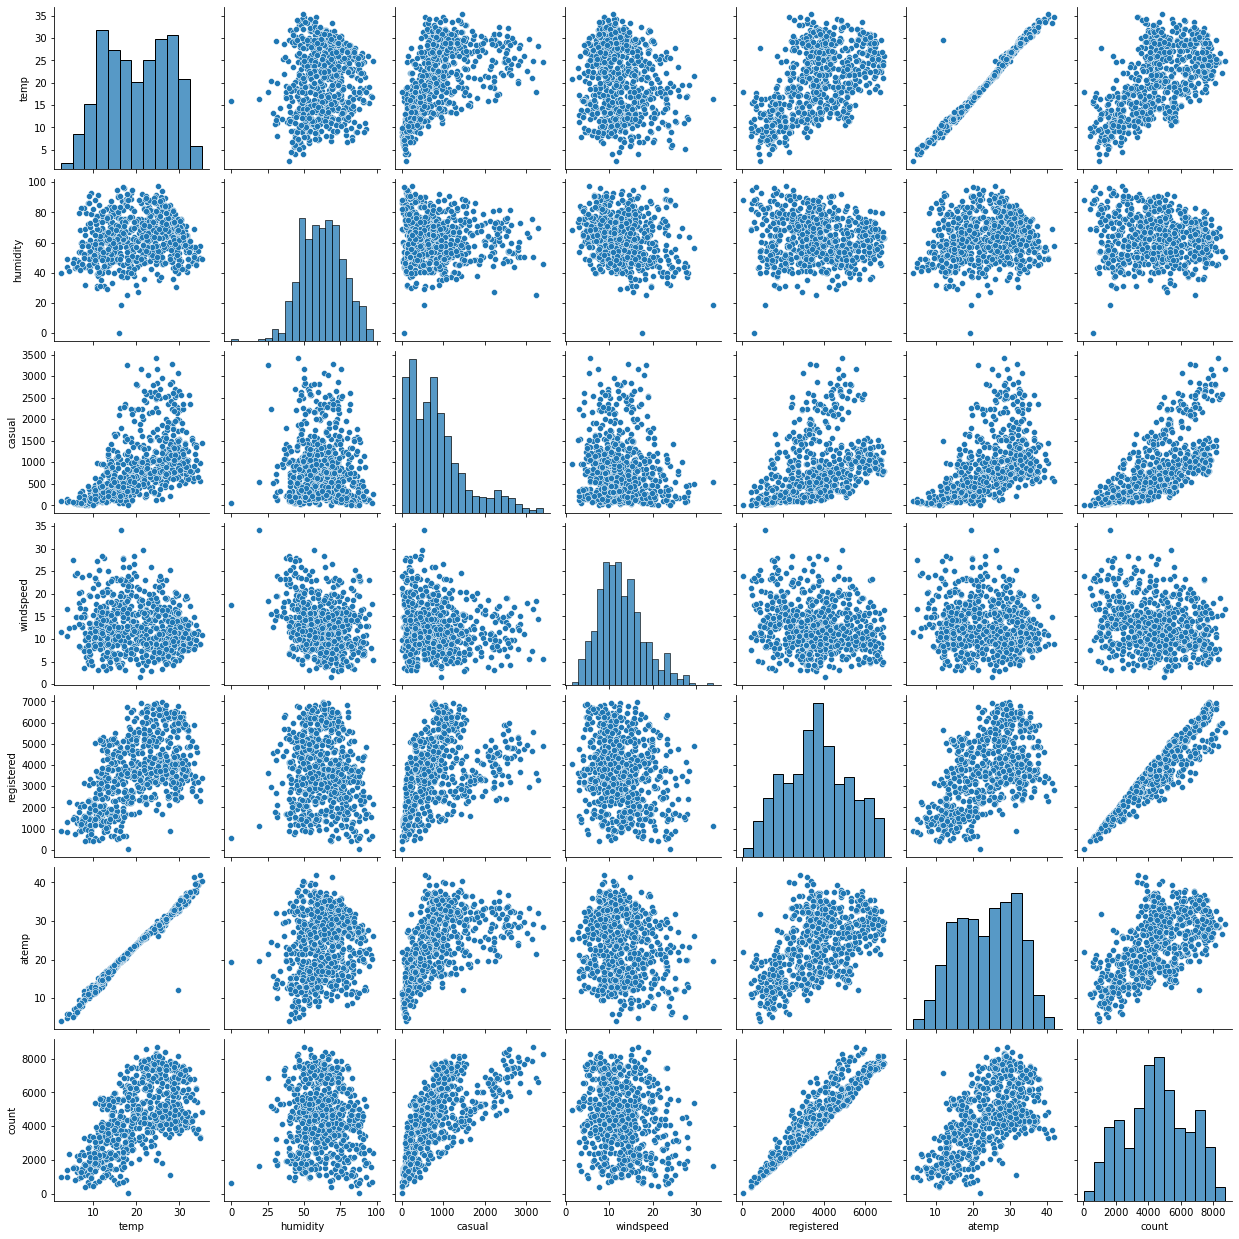

In [582]:
#List of numeric values for pairplot - temp, humidity,casual,windspeed,registered,atemp,count)
sns.pairplot(day, vars=['temp','humidity','casual','windspeed','registered','atemp','count'])
plt.show()

In [583]:
#observation - 
#1.good corelation between registered users and count
#2.temp and atemp are almost same except for 1 outlier so we will remove atemp
day=day.drop(['atemp'],axis=1)

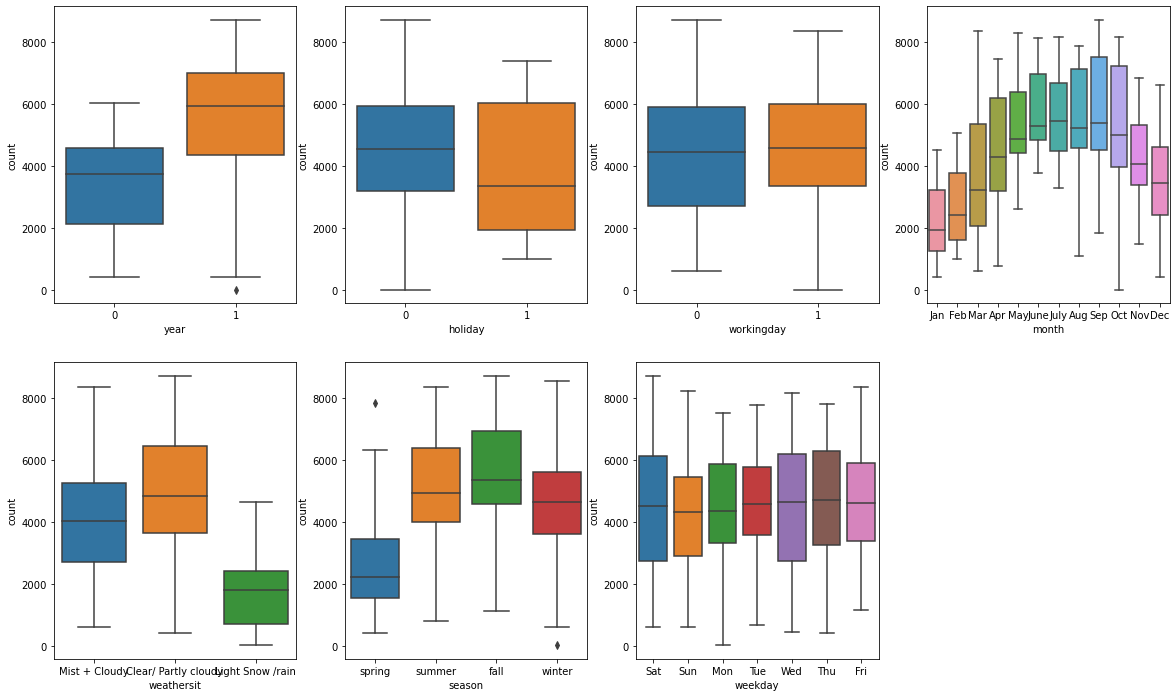

In [584]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = day)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = day)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = day)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = day)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = day)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = day)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = day)

plt.show()

In [585]:
#observations: Count is higher -
#in year 2019
#On a non-holiday
#in month of July and September
#On partly cloudy day
#in fall season
#on saturday


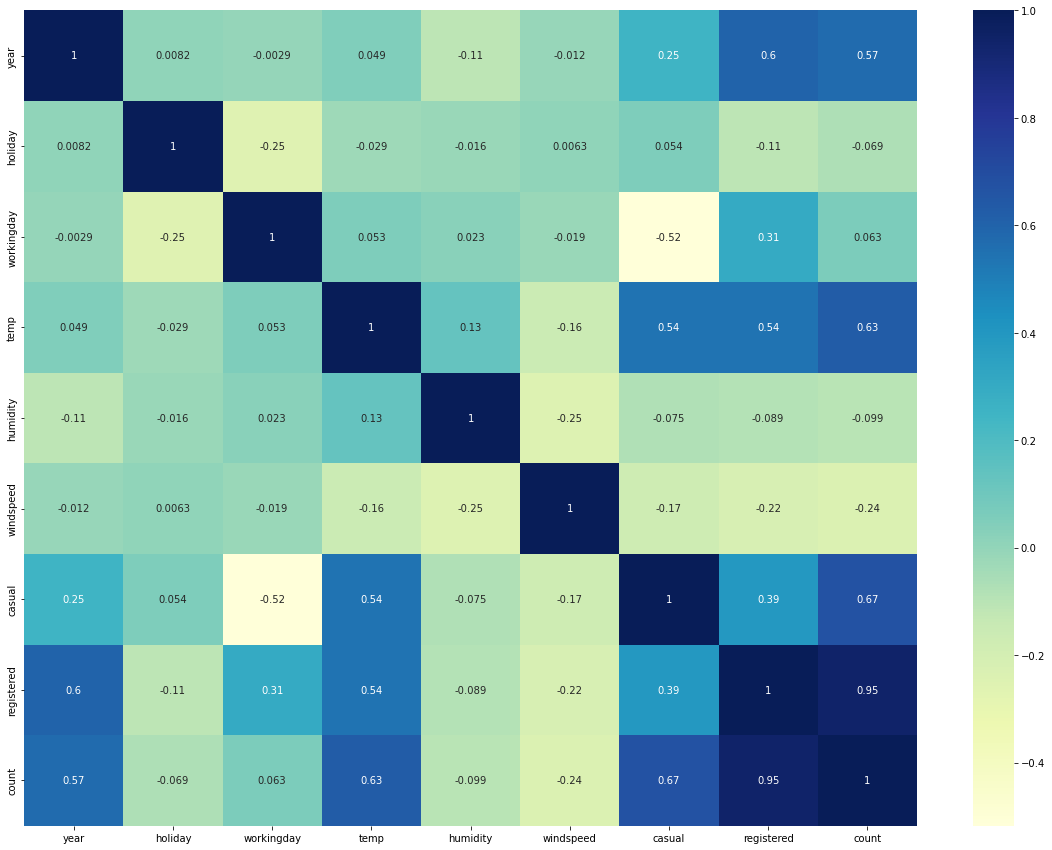

In [586]:
plt.figure(figsize=(20, 15))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [587]:
#Observation- Registered,casualand team are closely corelated to count
#Now we will create dummy variables for categorical variables

In [588]:
seasons=pd.get_dummies(day['season'],drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [589]:
weekdays=pd.get_dummies(day['weekday'],drop_first=True)
weekdays.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [590]:
months=pd.get_dummies(day['month'],drop_first=True)
months.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [591]:
weathers=pd.get_dummies(day['weathersit'],drop_first=True)
weathers.head()


,Light Snow /rain,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [592]:
# Weathersit has no entry for 4:'Snow /Thunderstorm
#now we will add the new columns and remove the older ones from which dummies were created
day=pd.concat([seasons,weekdays,months,weathers,day],axis=1)
day.drop(['season','weekday','month','weathersit'], axis = 1, inplace = True)
day.head()

,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,...,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,casual,registered,count
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,14.110847,80.5833,10.749882,331,654,985
1,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,14.902598,69.6087,16.652113,131,670,801
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,9.305237,43.6957,12.522300,82,1518,1600


In [593]:
#TRAIN _TEST SPLIT

df_train,df_test = train_test_split(day,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [594]:
#Next Step:Normalization-bring data betweeen range of 0 to 1

scaler = MinMaxScaler()

num_vars=['temp','humidity','casual','windspeed','registered','count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,...,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,casual,registered,count
576,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658
426,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255
728,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096
482,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0.345824,0.751824,0.380981,0.053337,0.214554,0.191095


In [595]:
df_train[num_vars].describe()

,temp,humidity,casual,windspeed,registered,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.254689,0.320883,0.523781,0.513499
std,0.225858,0.145846,0.206015,0.169803,0.227896,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.094179,0.199179,0.353487,0.356420
50%,0.542596,0.653714,0.212740,0.296763,0.525123,0.518638
75%,0.735215,0.754830,0.327415,0.414447,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


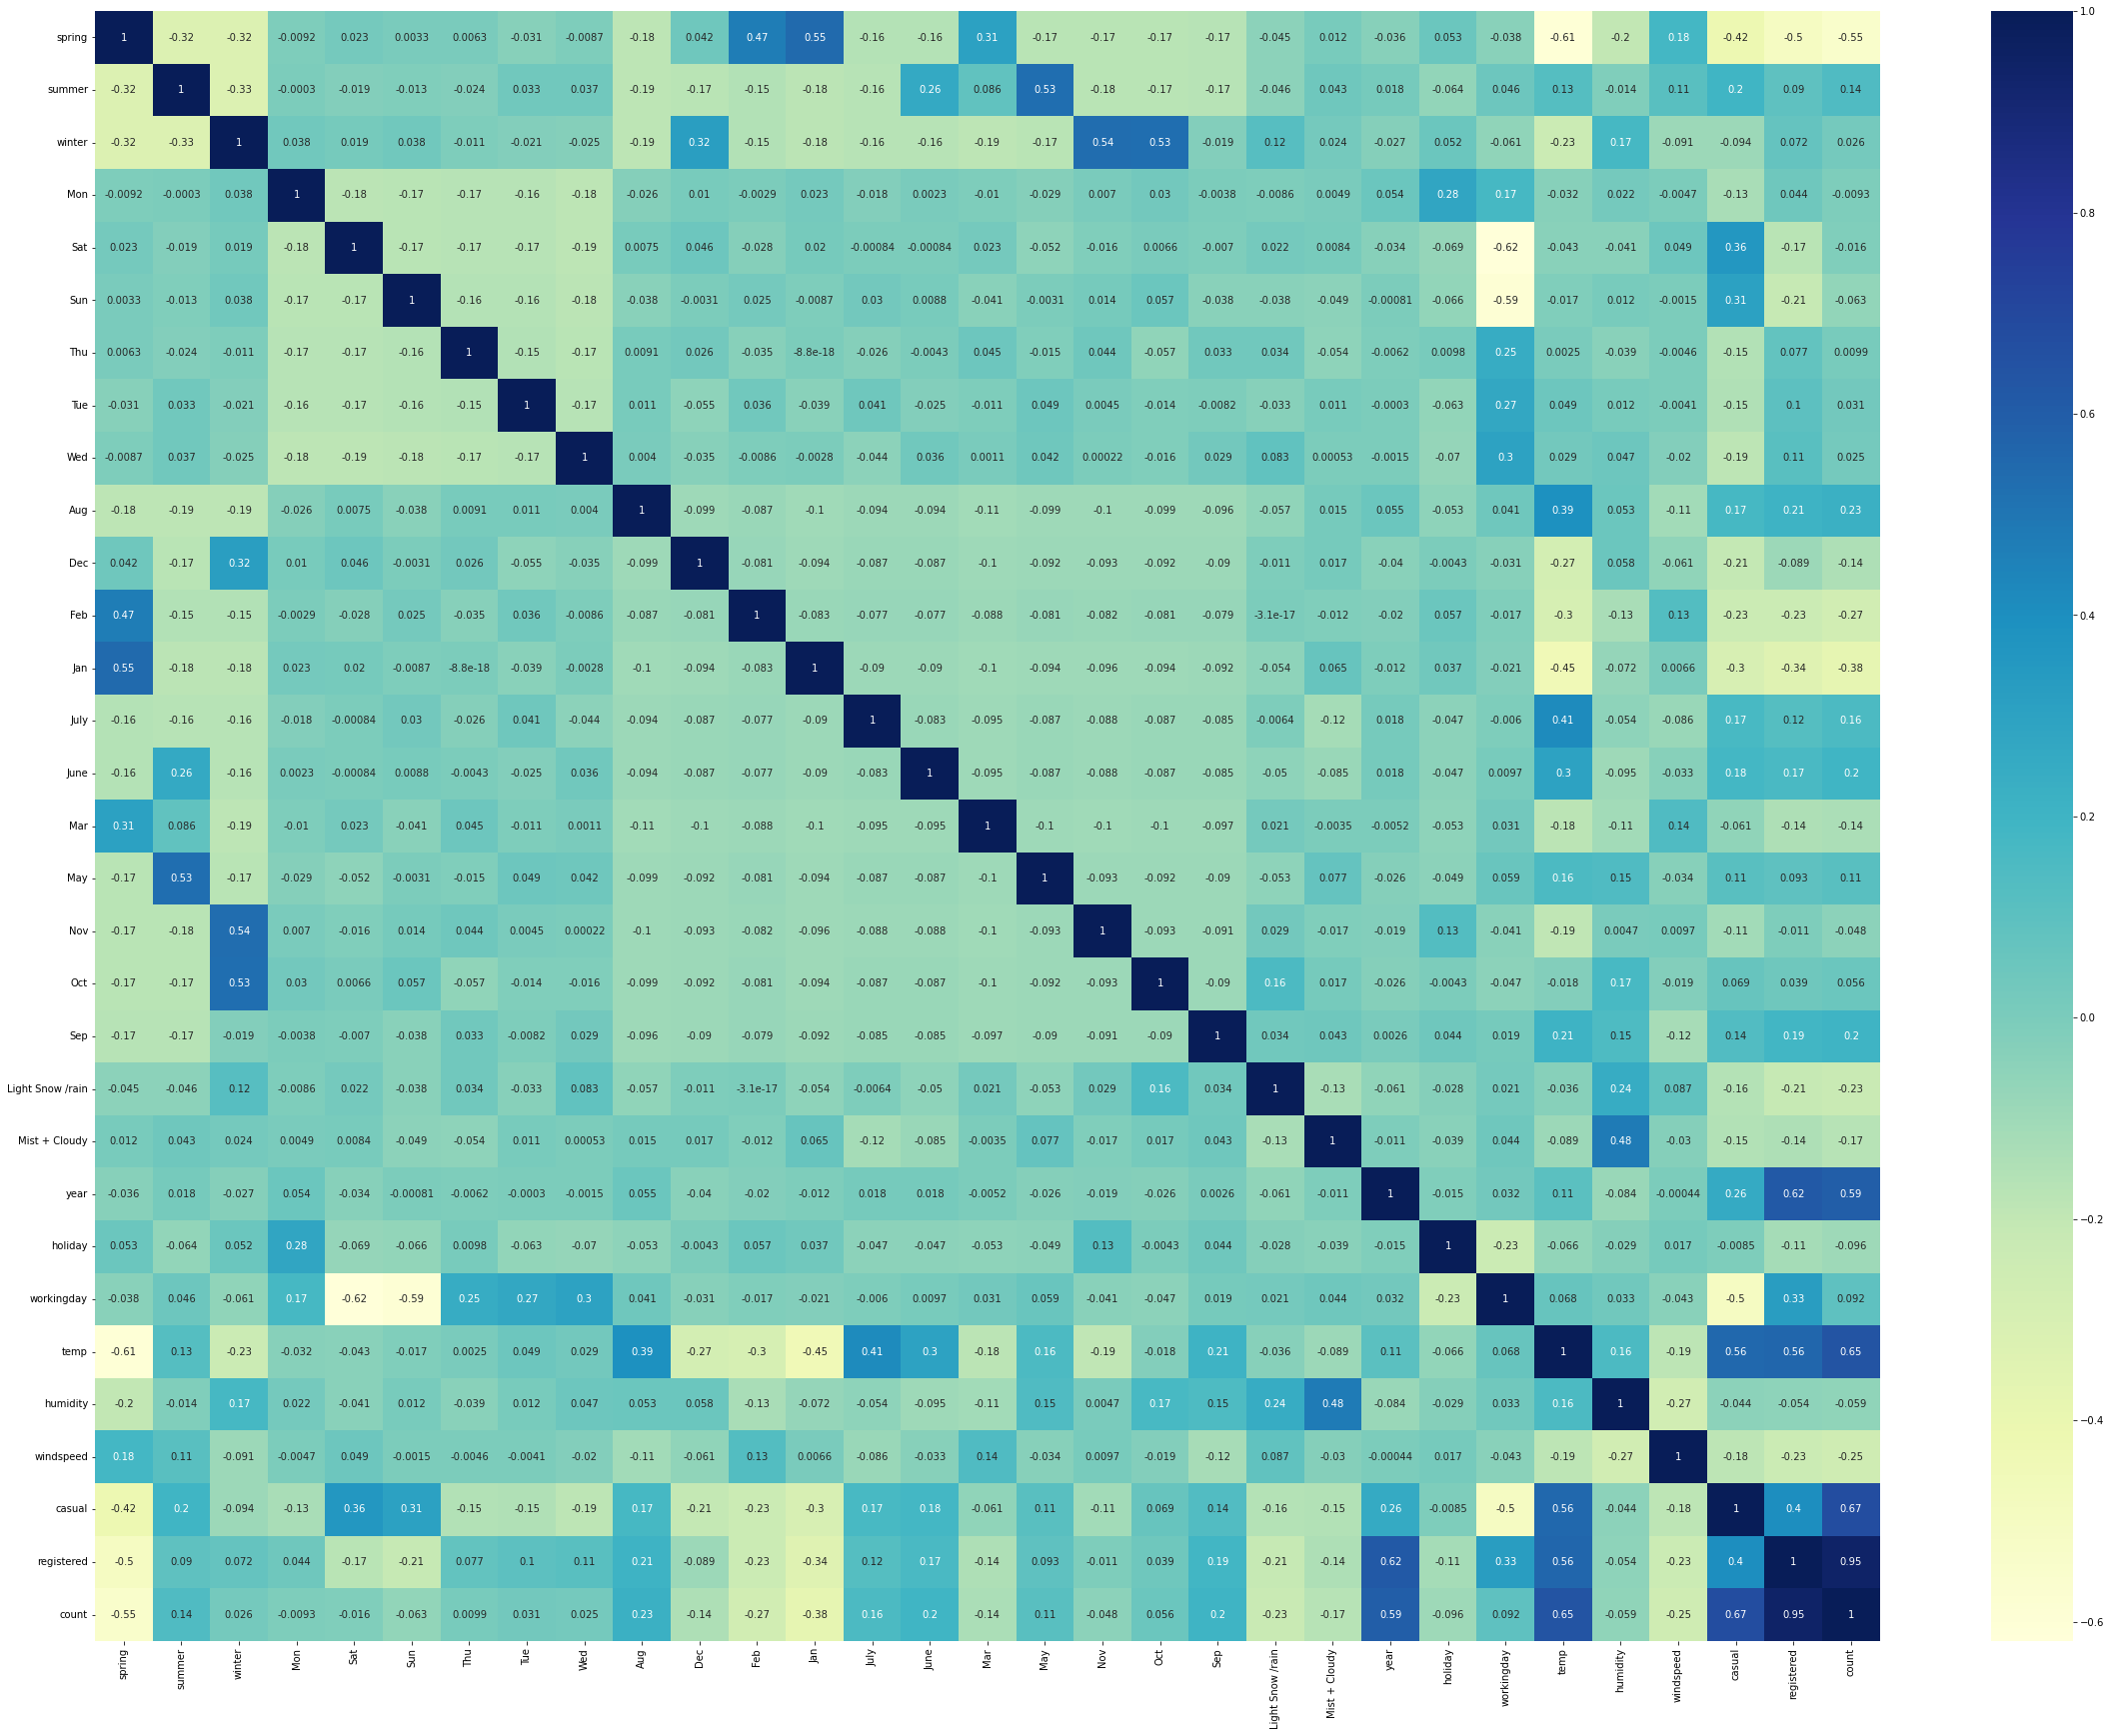

In [596]:
plt.figure(figsize=(40,30))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [597]:
#We will use the approach of RFE wherein we use a combination of automated and manual deduction of variables
#step 1-choose X and Y

y_train = df_train.pop('count')
X_train = df_train


In [598]:
X_train.head()

,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,...,Light Snow /rain,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,casual,registered
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220
426,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145
728,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869
482,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.751824,0.380981,0.053337,0.214554


In [599]:
lm = LinearRegression()
lm.fit(X_train, y_train)
#we will take 15 columns into consideration as number is a little high
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [600]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', False, 12),
 ('summer', False, 3),
 ('winter', False, 4),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 14),
 ('Tue', True, 1),
 ('Wed', False, 2),
 ('Aug', False, 7),
 ('Dec', True, 1),
 ('Feb', False, 10),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('Mar', True, 1),
 ('May', False, 11),
 ('Nov', True, 1),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Light Snow /rain', True, 1),
 ('Mist + Cloudy', False, 9),
 ('year', False, 15),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 13),
 ('humidity', True, 1),
 ('windspeed', False, 6),
 ('casual', True, 1),
 ('registered', True, 1)]

In [601]:
col=X_train.columns[rfe.support_]
col

Index(['Sat', 'Tue', 'Dec', 'Jan', 'July', 'June', 'Mar', 'Nov', 'Sep',
       'Light Snow /rain', 'holiday', 'workingday', 'humidity', 'casual',
       'registered'],
      dtype='object')

In [602]:
X_train.columns[~rfe.support_]

Index(['spring', 'summer', 'winter', 'Mon', 'Sun', 'Thu', 'Wed', 'Aug', 'Feb',
       'May', 'Oct', 'Mist + Cloudy', 'year', 'temp', 'windspeed'],
      dtype='object')

In [603]:
X_train_rfe=X_train[col]
X_train_rfe.head(5)

,Sat,Tue,Dec,Jan,July,June,Mar,Nov,Sep,Light Snow /rain,holiday,workingday,humidity,casual,registered
576,0,1,0,0,1,0,0,0,0,0,0,1,0.725633,0.294422,0.899220
426,1,0,0,0,0,0,1,0,0,0,0,0,0.640189,0.290765,0.446145
728,0,0,1,0,0,0,0,0,0,0,0,0,0.498067,0.110332,0.203869
482,1,0,0,0,0,0,0,0,0,0,0,0,0.504508,0.340750,0.444701
111,0,0,0,0,0,0,0,0,0,0,0,1,0.751824,0.053337,0.214554


In [604]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [605]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [606]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.803e+31
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                        0.00
Time:                        23:17:34   Log-Likelihood:                          17032.
No. Observations:                 510   AIC:                                 -3.403e+04
Df Residuals:                     495   BIC:                                 -3.397e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [607]:
#Need to remove July since pvalue is high


In [608]:
X_train_new = X_train_rfe.drop(["July"],axis=1)
X_train_lm = sm.add_constant(X_train_new)

In [609]:
lm=sm.OLS(y_train,X_train_lm).fit()

In [610]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.326e+29
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:17:34   Log-Likelihood:                 16698.
No. Observations:                 510   AIC:                        -3.337e+04
Df Residuals:                     495   BIC:                        -3.330e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.857e-16   4.28e-16  

In [611]:
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
13,registered,15.50
11,humidity,10.33
10,workingday,10.06
12,casual,7.69
0,Sat,1.95
3,Jan,1.33
2,Dec,1.32
1,Tue,1.26
6,Nov,1.25
7,Sep,1.22


In [612]:
#Remove humidity due to high VIF and hih pvalue
X_train_new = X_train_new.drop(["humidity"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.913e+30
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:17:34   Log-Likelihood:                 16890.
No. Observations:                 510   AIC:                        -3.375e+04
Df Residuals:                     496   BIC:                        -3.369e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.898e-16   1.94e-16  

In [613]:
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
12,registered,15.46
10,workingday,7.62
11,casual,6.30
0,Sat,1.81
1,Tue,1.25
7,Sep,1.21
3,Jan,1.20
2,Dec,1.19
4,June,1.19
5,Mar,1.19


In [614]:
#removing Jan due to very high  pvalue
X_train_new = X_train_new.drop(["Jan"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.194e+29
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:17:34   Log-Likelihood:                 16582.
No. Observations:                 510   AIC:                        -3.314e+04
Df Residuals:                     497   BIC:                        -3.308e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.939e-18   3.16e-16  

,Features,VIF
11,registered,15.35
9,workingday,7.05
10,casual,6.29
0,Sat,1.67
1,Tue,1.25
6,Sep,1.20
3,June,1.18
5,Nov,1.18
2,Dec,1.17
4,Mar,1.17


In [615]:
#removing Nov due to very high p value
X_train_new = X_train_new.drop(["Nov"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.471e+29
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:17:34   Log-Likelihood:                 16476.
No. Observations:                 510   AIC:                        -3.293e+04
Df Residuals:                     498   BIC:                        -3.288e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -7.91e-16    3.8e-16  

,Features,VIF
10,registered,14.78
8,workingday,7.04
9,casual,6.16
0,Sat,1.65
1,Tue,1.25
5,Sep,1.18
3,June,1.17
4,Mar,1.16
2,Dec,1.15
6,Light Snow /rain,1.07


In [616]:
#removing Mar due to very high p value
X_train_new = X_train_new.drop(["casual"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1187.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:17:34   Log-Likelihood:                 857.51
No. Observations:                 510   AIC:                            -1693.
Df Residuals:                     499   BIC:                            -1646.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0723      0.007  

,Features,VIF
9,registered,5.32
8,workingday,4.98
0,Sat,1.53
1,Tue,1.25
5,Sep,1.18
3,June,1.15
4,Mar,1.14
2,Dec,1.11
6,Light Snow /rain,1.07
7,holiday,1.06


In [617]:
#removing tue due to very high p value
X_train_new = X_train_new.drop(["Tue"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1319.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:17:34   Log-Likelihood:                 857.08
No. Observations:                 510   AIC:                            -1694.
Df Residuals:                     500   BIC:                            -1652.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0723      0.007  

,Features,VIF
8,registered,5.32
7,workingday,4.72
0,Sat,1.53
4,Sep,1.17
2,June,1.15
3,Mar,1.14
1,Dec,1.11
5,Light Snow /rain,1.07
6,holiday,1.06


In [618]:
#removing saturday due to very high VIF and comapratively high p value
X_train_new = X_train_new.drop(["Sat"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1486.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:17:34   Log-Likelihood:                 856.99
No. Observations:                 510   AIC:                            -1696.
Df Residuals:                     501   BIC:                            -1658.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0738      0.006  

,Features,VIF
7,registered,3.84
6,workingday,3.46
3,Sep,1.17
1,June,1.15
2,Mar,1.10
0,Dec,1.08
4,Light Snow /rain,1.04
5,holiday,1.04


In [619]:
#removing saturday due to very high VIF and comapratively high p value
X_train_new = X_train_new.drop(["Sep"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1695.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:17:34   Log-Likelihood:                 855.94
No. Observations:                 510   AIC:                            -1696.
Df Residuals:                     502   BIC:                            -1662.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0735      0.006  

,Features,VIF
6,registered,3.56
5,workingday,3.45
1,June,1.13
2,Mar,1.09
0,Dec,1.07
3,Light Snow /rain,1.04
4,holiday,1.04


In [646]:
num_vars=['Dec','June','Mar','Light Snow /rain','holiday','workingday']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,...,Light Snow /rain,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,casual,registered
184,0,0,0,1,0,0,0,0,0,0,...,-0.093961,1,0,-0.002888,-0.002531,29.793347,63.7917,5.459106,3065,2978
535,0,1,0,0,0,0,0,0,1,0,...,-0.093961,0,1,-0.002888,-0.002531,32.082500,59.2083,7.625404,872,5339
299,0,0,1,0,0,0,1,0,0,0,...,-0.093961,1,0,-0.002888,-0.002531,19.270000,81.2917,13.250121,240,2419
221,0,0,0,0,0,0,0,0,1,1,...,-0.093961,0,0,-0.002888,-0.002531,31.433347,42.4167,13.417286,884,3896
152,0,1,0,0,0,0,1,0,0,0,...,-0.093961,0,0,-0.002888,-0.002531,29.315000,30.5000,19.583229,736,4232


In [647]:
df_test.describe()

,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,...,Light Snow /rain,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,casual,registered
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,2.200000e+02,220.000000,220.000000,2.200000e+02,2.200000e+02,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.059091,...,-9.396059e-02,0.318182,0.481818,-2.888087e-03,-2.531354e-03,20.808400,61.934025,12.598352,876.177273,3684.381818
std,0.436599,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.236333,...,5.552248e-09,0.466833,0.500809,5.650708e-18,8.693398e-19,7.672796,14.429542,4.973534,711.161138,1518.870624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.396059e-02,0.000000,0.000000,-2.888087e-03,-2.531354e-03,3.957390,25.416700,1.500244,9.000000,432.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.396059e-02,0.000000,0.000000,-2.888087e-03,-2.531354e-03,14.119375,51.354200,9.031466,338.250000,2507.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.396059e-02,0.000000,0.000000,-2.888087e-03,-2.531354e-03,20.790424,60.708350,12.188004,741.000000,3674.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.396059e-02,1.000000,1.000000,-2.888087e-03,-2.531354e-03,27.299153,72.179375,15.385361,1189.000000,4640.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-9.396056e-02,1.000000,1.000000,-2.888087e-03,-2.531354e-03,34.815847,97.250000,27.999836,3410.000000,6844.000000


In [650]:

X_test=df_test
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,...,Light Snow /rain,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,casual,registered
184,0,0,0,1,0,0,0,0,0,0,...,-0.093961,1,0,-0.002888,-0.002531,29.793347,63.7917,5.459106,3065,2978
535,0,1,0,0,0,0,0,0,1,0,...,-0.093961,0,1,-0.002888,-0.002531,32.082500,59.2083,7.625404,872,5339
299,0,0,1,0,0,0,1,0,0,0,...,-0.093961,1,0,-0.002888,-0.002531,19.270000,81.2917,13.250121,240,2419
221,0,0,0,0,0,0,0,0,1,1,...,-0.093961,0,0,-0.002888,-0.002531,31.433347,42.4167,13.417286,884,3896
152,0,1,0,0,0,0,1,0,0,0,...,-0.093961,0,0,-0.002888,-0.002531,29.315000,30.5000,19.583229,736,4232


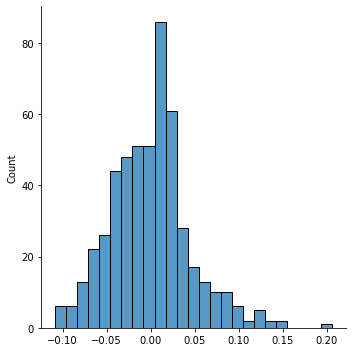

In [651]:
res=y_train-y_train_pred
sns.displot(res)